## Get data


[This](https://population.un.org/wpp/DVD/Files/2_Indicators%20(Probabilistic%20Projections)/UN_PPP2017_Output_PopTot.xls) is data is from United Nations population division. The dataset is prediction of world population from 2015 till 2100 with 5 years interval. We are taking a small subset of the data extracted which can be found in `data/world_population.csv`.


In [23]:
import pandas as pd

In [7]:
df = pd.read_csv('../data/world_population.csv')
df.head()

,Year,World Population
0,2015,7383009
1,2020,7795482
2,2025,8185614
3,2030,8551199
4,2035,8892702


# Set Index

setting of indices of time series column
* easy to understand the data
* In order to simplify plotting and computations, 
* as well as for reference for rolling or moving averages preferred compared to indices
* Uniqueness of rows are maintained


In [8]:
df.set_index('Year', inplace=True)
df.head()

,World Population
Year,
2015,7383009
2020,7795482
2025,8185614
2030,8551199
2035,8892702


## Plotting Data

In [ ]:
# Setting up plotting options 
import matplotlib.pyplot as plt

from pylab import rcParams
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

plt.style.use('ggplot')

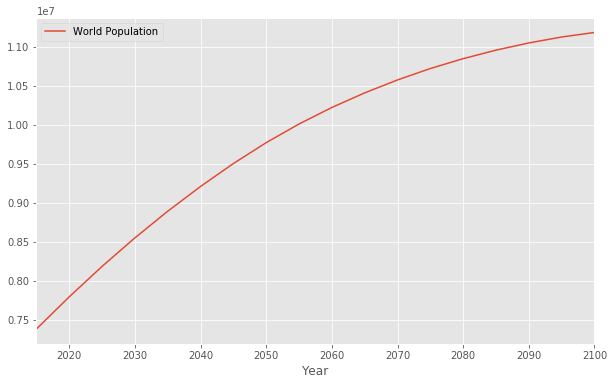

In [14]:
df.plot()

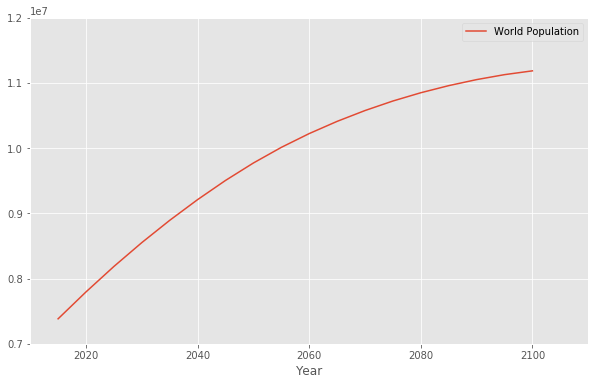

In [22]:
# Changing the x-limit and y-limit for better readability
df.plot(xlim=(2010, 2110), ylim=(7e6,12e6))

In [ ]:
# Different colors for different time interval

(7000000.0, 12000000.0)

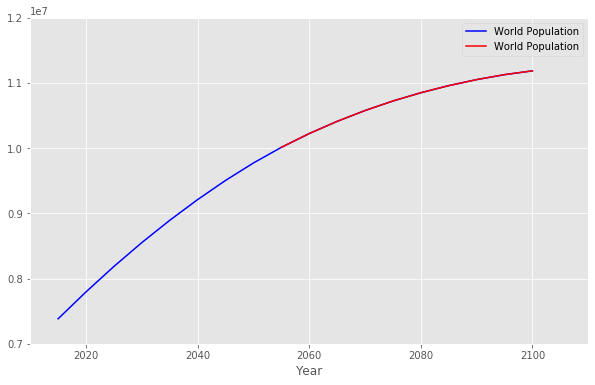

In [31]:
fig, ax = plt.subplots(1, 1)

df.plot(ax=ax,color='b')

df.iloc[8:].plot(ax=ax,color='r')

ax.set_xlim(2010, 2110)
ax.set_ylim(7e6,12e6)

# More analysis on new data

Kaggle competition dataset for international airline passengers, monthly totals in thousands, [Download](https://www.kaggle.com/andreazzini/international-airline-passengers).

In [92]:
airline_df = pd.read_csv('../data/international-airline-passengers.csv')

In [93]:
# There is 
airline_df.tail()


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


##  Cleaning up data

In [94]:
# Remove the last row as it's not used for analysis
airline_df = airline_df[:-1] 

# Rename columns for the readability
airline_df.rename(
    columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'No of Passanger'}, 
    inplace=True)

In [95]:
airline_df.tail()

,Month,No of Passanger
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [96]:
airline_df.dtypes

Month               object
No of Passanger    float64
dtype: object

In [97]:

airline_df['Month'] = airline_df['Month'].map(lambda x: x + '-01')

airline_df['Month'] = pd.to_datetime(airline_df['Month'], format='%Y-%m-%d')

In [98]:
airline_df.set_index('Month', inplace=True)

(-256, -96)

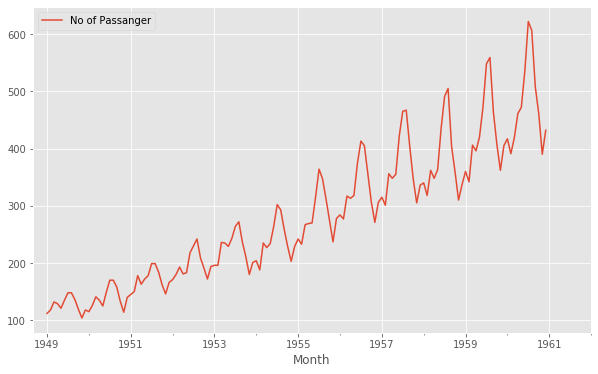

In [110]:
# Setting limiits with datetime
ax = airline_df.plot()
ax.set_xlim(pd.Timestamp('1948-09-01'), pd.Timestamp('1962-01-01'))

In [ ]:
airline_df